## Environment Setup:
Importing necessary packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Initial Data Exploration.
Reading Movies dataset.

In [2]:
movies=pd.read_csv('mymoviedb.csv',lineterminator='\n')

First look at movies data frame. As seen from next code cell, movies data frame contains 9 columns.
The description of each columns is as follows:
 - Release_Date: Date when the movie was released.
 - Title: Name of the movie.
 - Overview: Brief summary of the movie.
 - Popularity: based on the number of views per day.
 - Vote_Count: Total votes received from the viewers.
 - Vote_Average: Average rating based on vote count and the number of viewers out of 10.
 - Original_Language: Original language of the movies.
 - Genre: Categories the movie it can be classified as.
 - Poster_Url: Url of the movie poster.

In [3]:
movies.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


### Dropping Unneeded Columns:
Overview and Poster_Url columns are out of the scope of our analysis.

In [4]:
movies.drop(['Overview','Poster_Url'],inplace=True, axis=1)
movies.columns.tolist()

['Release_Date',
 'Title',
 'Popularity',
 'Vote_Count',
 'Vote_Average',
 'Original_Language',
 'Genre']

**Check for duplicated movies.**

In [5]:
display(movies.duplicated('Title').sum())
movies.drop_duplicates('Title',inplace=True)

314

## Validating Movies Data.
#### 1- Validating Columns Data Types and check for null:
 It's clear that there is no missing values, and three numerical columns which are: *Popularity*, *Vote_Count* , *Vote_Average*.

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9513 entries, 0 to 9826
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9513 non-null   object 
 1   Title              9513 non-null   object 
 2   Popularity         9513 non-null   float64
 3   Vote_Count         9513 non-null   int64  
 4   Vote_Average       9513 non-null   float64
 5   Original_Language  9513 non-null   object 
 6   Genre              9513 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 594.6+ KB


From our understanding of each column purpose there is no column datatype conversion needed except for **Release_Date** column.

In [7]:
movies['Release_Date']=pd.to_datetime(movies['Release_Date'])
movies.dtypes

Release_Date         datetime64[ns]
Title                        object
Popularity                  float64
Vote_Count                    int64
Vote_Average                float64
Original_Language            object
Genre                        object
dtype: object

### Validating categorical data:
- The only categorical column that it's possible to validate its values is Original_Language.

In [8]:
display(
    # Investigating number of Languages of movies:
    'number of Languages of movies = '+str(movies['Original_Language'].nunique()),
    # Investigating Languages of movies:
    movies['Original_Language'].unique().tolist(),
)

'number of Languages of movies = 43'

['en',
 'ja',
 'fr',
 'hi',
 'es',
 'ru',
 'de',
 'th',
 'ko',
 'tr',
 'cn',
 'zh',
 'it',
 'pt',
 'ml',
 'pl',
 'fi',
 'no',
 'da',
 'id',
 'sv',
 'nl',
 'te',
 'sr',
 'is',
 'ro',
 'tl',
 'fa',
 'uk',
 'nb',
 'eu',
 'lv',
 'ar',
 'el',
 'cs',
 'ms',
 'bn',
 'ca',
 'la',
 'ta',
 'hu',
 'he',
 'et']

Validating Numerical Columns:


**Vote_Average** column has a valid rang(0-10) with mean vote=6.5

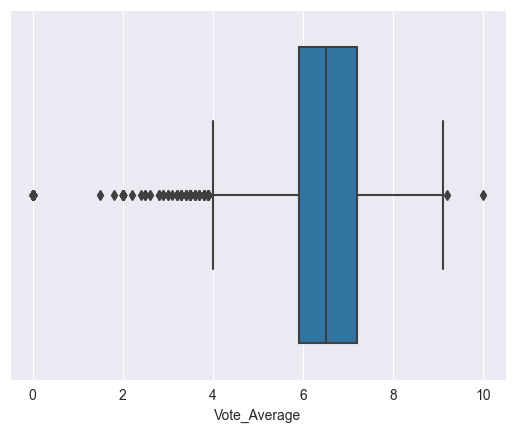

In [9]:
sns.boxplot(data=movies,x='Vote_Average')
plt.show()

The other numerical columns we have are Vote_Count,Popularity. Both have valid range.

In [10]:
movies[['Vote_Count','Popularity']].agg({'min','max'})

,Vote_Count,Popularity
max,31077,5083.954
min,0,13.354


## Data Cleaning.
- Neither Null values exist in our dataset.
- Recall that we need to encode **Genre**  to column for each movie genre.


In [11]:
genres_df = movies['Genre'].str.get_dummies(sep=',')
movies = pd.concat([movies, genres_df], axis=1)
movies.drop('Genre', axis=1,inplace=True)
movies.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Action,Adventure,Animation,Comedy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,en,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-03-01,The Batman,3827.658,1151,8.1,en,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-02-25,No Exit,2618.087,122,6.3,en,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2021-11-24,Encanto,2402.201,5076,7.7,en,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2021-12-22,The King's Man,1895.511,1793,7.0,en,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
genres_movies=movies.iloc[:,6:].copy()

## After Cleaning movies dataset we are ready to answer the question.
What is the movie with the highest Popularity rate? And what kind is it?
- Spiderman no way home is the most popular movie.
- genres= [' Adventure', ' Science Fiction', 'Action']

sns.barplot(data=movies.sort_values('Popularity', ascending=False).iloc[:10,:],x='Title',y='Popularity',color='b')
# Rotate the x-axis label title by 90 degrees
plt.xticks(rotation=90)
# Show the plot
plt.show()
display(genres_movies.columns[movies.sort_values('Popularity', ascending=False).iloc[0,6:].astype('bool')])

What year was the largest number of films produced?
Answer: 2021

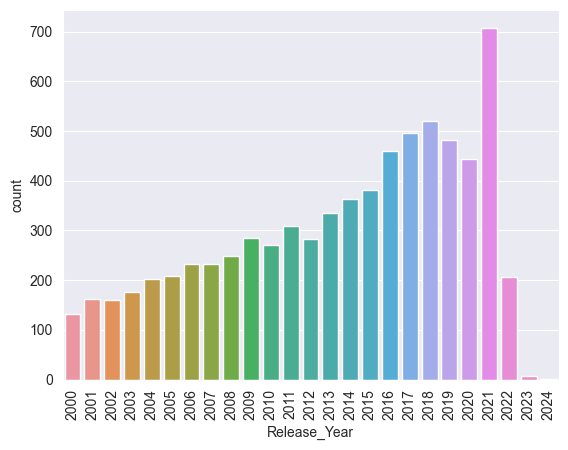

In [46]:
movies_copy=movies.copy()
movies_copy['Release_Year']=movies_copy['Release_Date'].dt.year
movies_copy=movies_copy[movies_copy['Release_Year']>=2000]
sns.countplot(data=movies_copy,x='Release_Year')
plt.xticks(rotation=90)
# Show the plot
plt.show()


What is most of the film genre?
Answer: Drama.


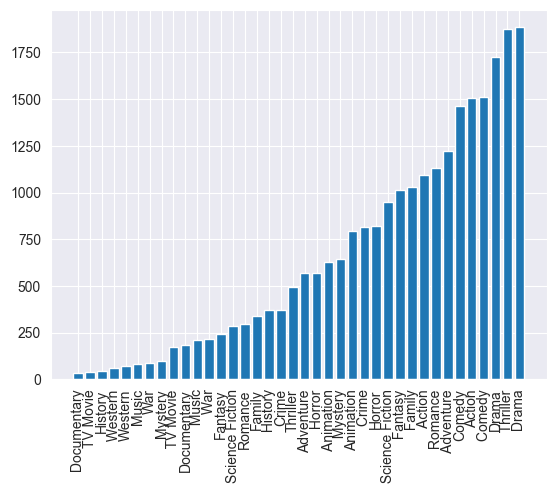

In [71]:
genres_movies=movies.iloc[:,6:].copy()
genres_movies_cpy=pd.DataFrame(genres_movies.sum())
genres_movies_cpy=genres_movies_cpy.reset_index()
genres_movies_cpy.columns=['Genre','Count']
genres_movies_cpy=genres_movies_cpy.sort_values('Count')
plt.bar(genres_movies_cpy['Genre'],genres_movies_cpy['Count'])
plt.xticks(rotation=90)
plt.show()

Which movie is the most popular and which is the less popular?

In [74]:
display(
    'The most popular movie is '+movies.sort_values('Popularity',ascending=False).iloc[0,1] ,
    'The least popular movie is ' + 'The most popular movie is '+movies.sort_values('Popularity',ascending=True).iloc[0,1]

)

'The most popular movie is Spider-Man: No Way Home'

'The least popular movie is The most popular movie is Threads'